<img src="./images/SCEC_logo-2colors_BlueRed.png" style="width:200px;"/>

# Open Science Data for Seismology

This notebook introduces key open science data types in seismology and provides hands-on exercis
es for accessing and exploring these datasets.

---

## Earthquake Catalogs, Observed Seismograms, Fault Geometry Models, Seismic Velocity Models

Seismology relies on diverse datasets to study the Earth's structure and seismic events:

- **Earthquake Catalogs**: Databases of earthquake locations, magnitudes, and times (e.g., USGS, IRIS).
- **Observed Seismograms**: Time-series data recorded by seismic stations.
- **Fault Geometry Models**: Representations of fault surfaces in 3D.
- **Seismic Velocity Models**: Maps of seismic wave speeds in the Earth's subsurface.

---

## Find, Select, Download, View

Accessing seismological data involves these steps:
1. **Find**: Locate datasets using platforms like IRIS DMC or USGS Earthquake Catalog.
2. **Select**: Filter datasets based on criteria like location, time range, or magnitude.
3. **Download**: Retrieve data in formats such as CSV, SAC, or NetCDF.
4. **View**: Visualize data with tools like Python, ObsPy, or GIS software.

---

## Open Science Data Access Software:

This notebook makes use of three seismological data access software distributions:
1. Earthquake Catalogs - pyCSEP
2. Observed Seismograms - Obspy
3. Fault Models - wget
4. Velocity Models - UCVM

An overview of EarthScope Data Access tools

In [1]:
import webbrowser
tools_url = "https://ds.iris.edu/ds/nodes/dmc/tools"
# Open the URL in the default web browser
webbrowser.open(tools_url)

True

---

## Exercise One: Earthquake Catalog Data Access

In this exercise, you will find earthquakes data service, select earthquakes of interest, download the earthquakes to your computer, and view the retrieved dataset.

1. **Find**: Locate datasets using platforms like IRIS DMC or USGS Earthquake Catalog.

Researchers can find earthquake catalogs using the open-data services of the U.S. Geological Survey. The U.S.G.S integrates information from a multiple seismic networks and provides open access to the resulting earthquake catalog through web interface and programmatic API.

Other seismological data services also provide earthquake catalogs, which have special characteritics such as coverage region, coverage time period, magnitude completeness, and location methods.

2. **Select**: Filter datasets based on criteria like location, time range, or magnitude.

Researchers select the earthquakes they want in their catalog by defining parameters including region, start-date, end-date, minimum magnitude.

In the following example, we use pyCSEP to retrieve catalogs from USGS Comcat service. In this selection process, we specify the earthquakes we want to retrieve from the catalog. Below, we use parameters that request 1 hour of earthquakes Mag 2.5+ after the Mendocino mainshock.

<ol>
<li>Start_Time: 2024-12-05T18:44:21</li>
<li>End_time: 2024-12-05T19:44:21</li>
<li>Minimum Mag: 2.5</li>
<li>Min latitude: 31.5</li> 
<li>Max Latitude: 43.0</li>
<li>Min Longitude: -125.4</li>
<li>Max Longitude: -113.1</li>
<li>Max Depth: 1000</li>
</ol>

In [2]:
import csep
from csep.utils import datasets, time_utils, comcat, plots
from csep.core import regions

# set start and end date
start_time = time_utils.strptime_to_utc_datetime('2024-12-05 18:44:21.0')
end_time = time_utils.strptime_to_utc_datetime('2024-12-05 19:44:21.0')

# The Query_Comcat methods uses these default parameters:
# min_latitude=31.5
# max_latitude=43.0
# min_longitude=-125.4
# max_longitude=-113.1
# min_mw = 2.5
# retrieve events in ComCat catalogue between start and end date
catalog = csep.query_comcat(start_time, end_time)
print(catalog)

Fetched ComCat catalog in 0.10368800163269043 seconds.

Downloaded catalog from ComCat with following parameters
Start Date: 2024-12-05 18:44:21.110000+00:00
End Date: 2024-12-05 19:38:07.690000+00:00
Min Latitude: 38.8018333333333 and Max Latitude: 40.4435
Min Longitude: -125.021666666667 and Max Longitude: -119.0383
Min Magnitude: 2.52
Found 21 events in the ComCat catalog.

        Name: None

        Start Date: 2024-12-05 18:44:21.110000+00:00
        End Date: 2024-12-05 19:38:07.690000+00:00

        Latitude: (38.8018333333333, 40.4435)
        Longitude: (-125.021666666667, -119.0383)

        Min Mw: 2.52
        Max Mw: 7.0

        Event Count: 21
        


3. **Download**: Retrieve data in formats such as CSV, SAC, or NetCDF.
Researchers can download the data for use on their computer. 

Selecting the output format as json will allow viewing using Google Chrome, text editors, and other tools and software that can read json files. Now, use pyCSEP to read the downloaded catalog and plot it on a map.

In [3]:
catalog.write_json("Mendocino_Seismicity_Dec_2025.json")


4. **View**: Visualize data with tools like Python, ObsPy, or GIS software.

Researchers view the data and metadata using platform and data specific tools. For earthquake catalogs, KML files can be read using Chrome Browser and Google Earth, good for visualizing the catalog. For processing the data, formats like Comma Separted Values (CSV) which can be read with text editors or spreadsheet software are often used to view data.



        Name: None

        Start Date: 2024-12-05 18:44:21.110000+00:00
        End Date: 2024-12-05 19:38:07.690000+00:00

        Latitude: (38.8018333333333, 40.4435)
        Longitude: (-125.021666666667, -119.0383)

        Min Mw: 2.52
        Max Mw: 7.0

        Event Count: 21
        


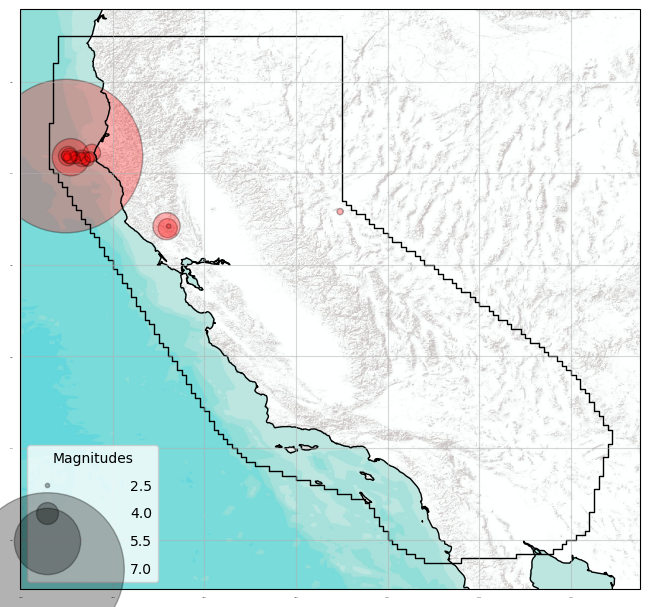

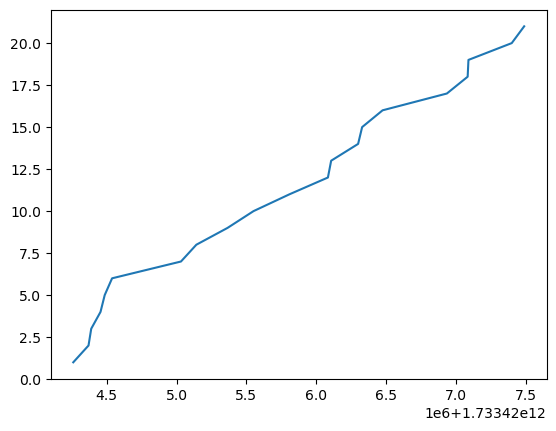

In [4]:
import csep
import matplotlib.pyplot as plt
# lets assume we already loaded in some catalog
catalog = csep.load_catalog("Mendocino_Seismicity_Dec_2025.json")

# Filter observed catalog using the same region as the forecast
catalog = catalog.filter_spatial(csep.core.regions.california_relm_region())
print(catalog)

# Plot the catalog
catalog.plot()

# quick plot
fig, ax = plt.subplots()
ax.plot(catalog.get_epoch_times(), catalog.get_cumulative_number_of_events())
plt.show()

---

## Exercise Two: Observed Seismograms Data Access

In this exercise, you will find earthquakes data service, select earthquakes of interest, download the earthquakes to your computer, and view the retrieved dataset.

1. **Find**: Locate datasets using platforms like IRIS DMC or USGS Earthquake Catalog.

Researchers can retrieve observed seismograms for significant earthquake for many stations using the U.S.G.S open data services. There is a wide variety of data access options, and researchers will select the most appropriate options based on their intended use of the seismograms.

Other seismological data services also provide observed seismograms, including groups that focus on strong ground motion data used for civil engineering and earthquake engineering research.

The Earthscope WILBUR interface helps users select seismograms of interest. Either by earthquake, by station, or by time.

In [5]:
import webbrowser
event_url = "https://ds.iris.edu/wilber3/find_event"
# Open the URL in the default web browser
webbrowser.open(event_url)

True


2. **Select**: Filter datasets based on criteria like location, time range, or magnitude.


Use Obpsy to use data service to retrieve seismograms for a specific stations for a specific event.

Researchers select the seismograms they want by defining parameters including earthquake, site, duration.

As an example, retrieve the ground motions at USC from the Mag 7.0 in Northern California. We are going to use both event information and station information in our selection:

For the Event we will use the recent M7.0 Northern California Event:

Use the Obspy IRIS data access client to access Station USC for Mendocino Mainshock + 5 minutes.

For earthquake seismograms, researchers can specify ground motions by station time duration. Collection of seismograms from significant events are also available. The information required to retrieve our seismogram of interest, USC for the Mendacinon 7.0 uses these inputs:

The station USC is approximately 1000km from the epicenter of the event, so an estimated P wave travel time of about 

Event Page Information Event Time. For start time, use Earthquake Origin time. For large event, request 5 minutes of 20sps broadband vertical component velocity data (BHZ). USC Station and broadband 10Hz Channel is defined as:

<ol>
<li>Start_Time: 2024-12-05T18:44:21</li>
<li>End_time: 2024-12-05T18:49:21</li>
<li>Network: CI</li>
<li>Station: USC</li>
<li>Channel : BHZ (vertical broadband - 20 sps)</li>
<li>Location: --</li>
<li>Quality: -</li>
<li>Format: GeoCSV</li>
</ol>

Approximate Travel Time Calculation: Assume an average P-wave velocity of 7 km/s for this mixed path:
<pre>
Travel time=Distance/Velocity = 1000 km/7 km/s ≈ 143 seconds
</pre>

So, the P-wave travel time is roughly 2 minutes and 23 seconds.

In [6]:
from obspy.clients.fdsn import Client
client = Client("IRIS")
from obspy import UTCDateTime
t = UTCDateTime("2024:12:05T18:44:21.000")
st = client.get_waveforms("CI", "USC", "--", "BHZ", t, t + (5 * 60))
st.filter(type='lowpass', freq=10.0)
print("Number of components retrieved: %d and number of samples retrieved: %d"%(len(st), len(st[0])))

Number of components retrieved: 1 and number of samples retrieved: 12000


3. **Download**: Retrieve data in formats such as CSV, SAC, or NetCDF.

Researchers can download the data for use on their computer. Computational models of earthquake processes will often require use of open science data sources. When downloading data, an important consideration is the data format. Select software on your computer to read a data format before you download data in that format.

In [7]:
st.write('Mendocino_Mainshock_USC.sac', format='SAC')

4. **View**: Visualize data with tools like Python, ObsPy, or GIS software.

Researchers view the data and metadata using platform and data specific tools. For seismograms, formats like GeoCSV can be read and plotted using programs like Excel. Seismologist often use seismogram specific visualization tools such as SAC, ObsPy, and others to view seismogram data.

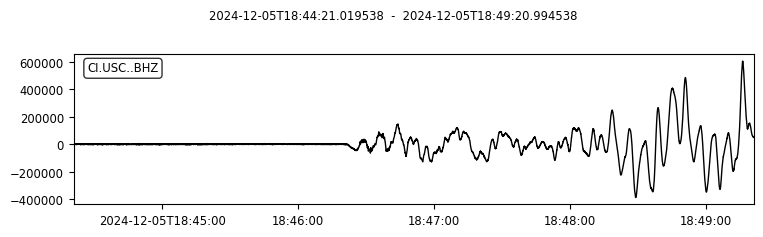

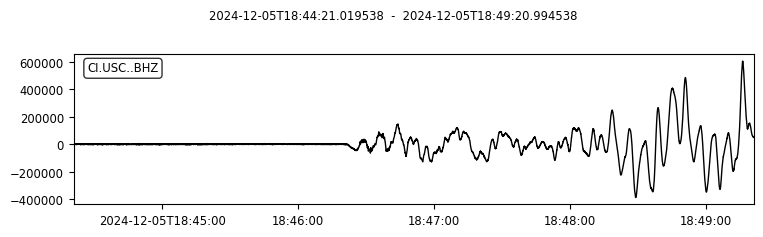

In [8]:
st.plot()

---

## Exercise Three: Fault Geometry Model Data Access

In this exercise, you will find California Fault Geometry models and view the retrieved dataset.

1. **Find**: Locate datasets using platforms like IRIS DMC or USGS Earthquake Catalog.

Researchers can retrieve fault geometry files from the USGS and from other sources including SCEC. The fault geometry descriptions my include location of faults at the surface, or full 3D geometry files.

The USGS offers a map-based display showing USGS Fault Surface Geometry File:

In [9]:
import webbrowser
url = "https://www.usgs.gov/programs/earthquake-hazards/faults"
# Open the URL in the default web browser
webbrowser.open(url)

True

2. **Select**: Filter datasets based on criteria like location, time range, or magnitude.

Users select the fault of interest, then downloads the fault geometry files in their preferred format.

3. **Download**: Retrieve data in formats such as CSV, SAC, or NetCDF.

Researchers can download fault geometry files for use on their computer. A KMZ file containing conterminous US fault geometries is available through the USGS Web service.

In [10]:
import requests
usgs_fdb_url = ("https://www.sciencebase.gov/catalog/item/655bebe7d34ee4b6e05cc19f")
response = requests.get(usgs_fdb_url)
kml_file = "NSHM23_FSD_v3.kml"

if response.status_code == 200:
    with open(kml_file, 'wb') as file:
        file.write(response.content)
    print('File downloaded successfully')
else:
    print('Failed to download file')

File downloaded successfully


In [11]:
import requests
usgs_fdb_url = ("https://www.sciencebase.gov/catalog/item/655bebe7d34ee4b6e05cc19f")
response = requests.get(usgs_fdb_url)
kml_file = "NSHM23_FSD_v3.geojson"

if response.status_code == 200:
    with open(kml_file, 'wb') as file:
        file.write(response.content)
    print('File downloaded successfully')
else:
    print('Failed to download file')

File downloaded successfully


4. **View**: Visualize data with tools like Python, ObsPy, or GIS software.

Researchers view the data and metadata using platform and data specific tools. For fault in KMZ format, google chrome can read the files.

---

## Exercise Four: Seismic Velocity Model Data Access

In this exercise, you will find informatoin about California seismic velocity models and view the retrieved dataset.

1. **Find**: Locate datasets using platforms like IRIS DMC or USGS Earthquake Catalog.

Researchers can retrieve seismic velocity model information for California from SCEC. SCEC's seismic velocity models are access through a web browser.

2. **Select**: Filter datasets based on criteria like location, time range, or magnitude.

Users select the velocity model of interest, and the type of data they want (point, vertical profile, cross section etc) using a GUI Interface:

<ol>
<li> CVM-H </li>
<li> Vertical Profile </li>
<li> Lat: </li>
<li> Long: </li>
<li> Depth: </li>
<li> Property: </li>
</ol>

3. **Download**: Retrieve data in formats such as CSV, SAC, or NetCDF.

Researchers can download seismic velocity model data in csv format.

4. **View**: Visualize data with tools like Python, ObsPy, or GIS software.

Researchers view the data and metadata using platform and data specific tools. For fault in KMZ format, google chrome can read the files.

In [12]:
url = "http://moho.scec.org/UCVM_web/web/viewer.php"
# Open the URL in the default web browser
webbrowser.open(url)

True

**End of Exercise 2:**

As follow-up exercise, try updating this notebook by retrieve different catalogs, seismograms, fault models, and velocity models